# テストデータの作成
手元で提出テストができるようにテストデータを作成する

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle

## データ準備

### 訓練データの読み込み

In [2]:
train_data = np.load("../1_data/train_data.npy")
train_label = np.load("../1_data/train_label.npy")

データの形状を確認する  
形状は、それぞれ下記の通り
- data：(Nデータ数, Cチャネル数, H高さ方向, W横方向)として出力
- label：(Nデータ数、クラス数)

In [3]:
print("train_data.shape=", train_data.shape)
print("train_label.shape=", train_label.shape)

train_data.shape= (3000, 1, 28, 28)
train_label.shape= (3000, 15)


データの中身を確認する  
全部出力すると見づらいので、0番目のデータについて、縦横ともに5マス(0〜4）のみ表示

In [4]:
test_data = train_data
test_label = train_label

In [5]:
print("test_data.shape=", test_data.shape)
print("test_label.shape=", test_label.shape)

test_data.shape= (3000, 1, 28, 28)
test_label.shape= (3000, 15)


In [6]:
from common.katakana_data import plot_katakana

2022-09-29 19:37:56.862832: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-29 19:37:57.038334: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-29 19:37:57.038408: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-29 19:37:57.068727: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-29 19:37:57.807600: W tensorflow/stream_executor/platform/de

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


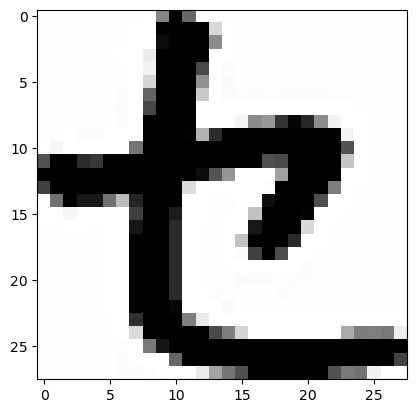

In [7]:
plot_katakana(test_data, test_label, 1)

In [8]:
# num_image = 1450 - len(test_data)
# print(num_image)

## データ拡張
14500個のデータが必要なのでデータ拡張する

In [9]:
# from keras.preprocessing.image import ImageDataGenerator

In [10]:
params = {
    'zoom_range': [0.8, 1.2],
    'rotation_range': 20,
    # 'vertical_flip': True,
    # 'horizontal_flip': True,
    # 'height_shift_range': 0.1,
    # 'width_shift_range': 0.1,
    'shear_range': 20,
    # 'channel_shift_range': 127
}

In [12]:
from common.katakana_data import data_augmentation

# データ拡張の準備（パラメータ定義）
augm_flag = True
num_image = 14500 - len(test_data)

# データ拡張の実行（flow）
if augm_flag:
    test_data, test_label = data_augmentation(test_data, test_label, params, num_image)

3000個のデータから11500個の水増しデータを作成します
0個目の水増しデータを作成中【進捗率：0e+00%】
200個目の水増しデータを作成中【進捗率：2e+00%】
400個目の水増しデータを作成中【進捗率：3e+00%】
600個目の水増しデータを作成中【進捗率：5e+00%】
800個目の水増しデータを作成中【進捗率：7e+00%】
1000個目の水増しデータを作成中【進捗率：9e+00%】
1200個目の水増しデータを作成中【進捗率：1e+01%】
1400個目の水増しデータを作成中【進捗率：1e+01%】
1600個目の水増しデータを作成中【進捗率：1e+01%】
1800個目の水増しデータを作成中【進捗率：2e+01%】
2000個目の水増しデータを作成中【進捗率：2e+01%】
2200個目の水増しデータを作成中【進捗率：2e+01%】
2400個目の水増しデータを作成中【進捗率：2e+01%】
2600個目の水増しデータを作成中【進捗率：2e+01%】
2800個目の水増しデータを作成中【進捗率：2e+01%】
3000個目の水増しデータを作成中【進捗率：3e+01%】
3200個目の水増しデータを作成中【進捗率：3e+01%】
3400個目の水増しデータを作成中【進捗率：3e+01%】
3600個目の水増しデータを作成中【進捗率：3e+01%】
3800個目の水増しデータを作成中【進捗率：3e+01%】
4000個目の水増しデータを作成中【進捗率：3e+01%】
4200個目の水増しデータを作成中【進捗率：4e+01%】
4400個目の水増しデータを作成中【進捗率：4e+01%】
4600個目の水増しデータを作成中【進捗率：4e+01%】
4800個目の水増しデータを作成中【進捗率：4e+01%】
5000個目の水増しデータを作成中【進捗率：4e+01%】
5200個目の水増しデータを作成中【進捗率：5e+01%】
5400個目の水増しデータを作成中【進捗率：5e+01%】
5600個目の水増しデータを作成中【進捗率：5e+01%】
5800個目の水増しデータを作成中【進捗率：5e+01%】
6000個目の水増しデータを作成中【進捗率：5e+01%】
6200個目の水増しデータを作成中【進捗率：5e+01%】
6400個目の水増しデータを作成

In [39]:
# num_image = 1450 - len(test_data)
# # num_image = 10
# test_data, test_label = data_augmentation(test_data, test_label, params, num_image)

In [53]:
print("test_data.shape=", test_data.shape)
print("test_label.shape=", test_label.shape)

test_data.shape= (14500, 1, 28, 28)
test_label.shape= (14500, 15)


[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


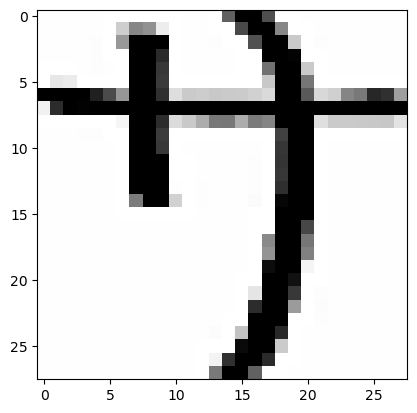

In [54]:
plot_katakana(test_data, test_label, 200)

### データの保存

In [55]:
np.save("../1_data/test_data.npy", test_data)
np.save("../1_data/test_label.npy", test_label)